In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
#pip install -U git+https://github.com/taller-mexicano-de-nebulosas-ionizadas/AI.git
from tmniai import manage_RM

/home/morisset/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [2]:
def test_x2(X, y, X_test, solver='adam', activation='tanh', hidden_layer_sizes=(10,), noise=False, 
            discret=True, verbose=False):
    """
    Creating, training and ploting ANN for y = sqrt(X) problem.
    Using the PyNeb Regressor machine tool
    """
    if discret:
        RM1 = manage_RM(RM_type = 'KerasDis', X_train=X, y_train=y, verbose=verbose, 
                        noise=noise, y_vects=np.linspace(-10,10,100), scaling=True, 
                        clear_session=True)
        RM1.init_RM(solver=solver, activation=activation,
                    hidden_layer_sizes=hidden_layer_sizes, epochs=100)
        RM1.train_RM()
        RM1.set_test(X_test, scaleit=True)
        RM1.predict(scoring=False, reduce_by='max')
        pred_max = RM1.pred
        RM1.predict(scoring=False, reduce_by='mean')
        pred_mean = RM1.pred
        plt.scatter(X_test, pred_max, edgecolor='', c='y')
        plt.scatter(X_test, pred_mean, edgecolor='', c='c')    
    else:
        RM1 = manage_RM(RM_type = 'Keras', X_train=X, y_train=y, verbose=verbose, 
                        noise=noise, scaling=True, clear_session=True)
        RM1.init_RM(solver=solver, activation=activation,
                    hidden_layer_sizes=hidden_layer_sizes, epochs=100)
        RM1.train_RM()
        RM1.set_test(X_test, scaleit=True)
        RM1.predict(scoring=False)
        pred = RM1.pred
        plt.scatter(X_test, pred, edgecolor='', c='b', marker='.')

In [3]:
n_samples=3000
y1 = np.random.uniform(-10, 10, n_samples)
X1 = y1**2
y2 = np.random.uniform(0, 10, n_samples)
X2 = y2**2
X_test = np.linspace(0,100,1000)

W0913 14:54:03.238195 140385050036032 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0913 14:54:03.250641 140385050036032 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0913 14:54:03.252859 140385050036032 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 14:54:03.278664 140385050036032 deprecation_wrapper.py:119] From /home/morisset/GoogleDrive/Pro/AI/tmniai/Regressor/RegressionModel.py:235: The name tf.random.set_random_seed is deprecated. P

RM trained. Score = nan
RM trained. Score = nan


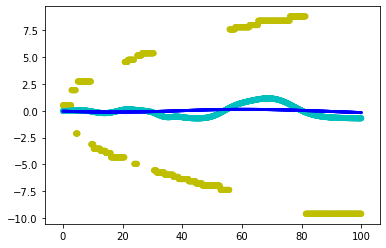

In [4]:
# Training with positive and negative values leads to wring result fromthe single regressor and the mean of the discretized regressor
test_x2(X1, y1, X_test)
test_x2(X1, y1, X_test, discret=False)

RM trained. Score = nan
RM trained. Score = nan


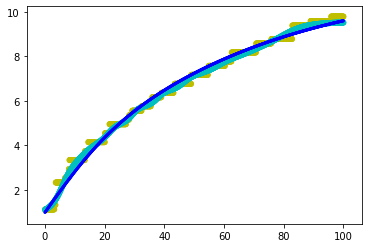

In [5]:
# Training with positive values only solves the issue. But data can be double valued
test_x2(X2, y2, X_test)
test_x2(X2, y2, X_test, discret=False)

RM trained. Score = nan
RM trained. Score = nan


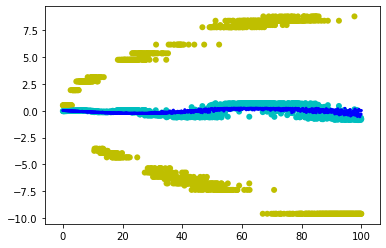

In [6]:
# Adding noise to the [-10, 10] data set
test_x2(X1, y1, X_test, noise=0.1)
test_x2(X1, y1, X_test, noise=0.1, discret=False)

RM trained. Score = nan


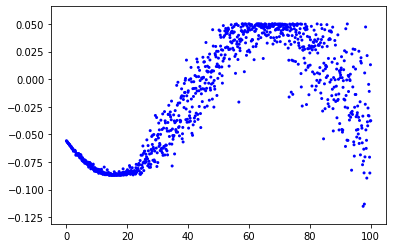

In [7]:
# Close-up to the single regressor result: it appears to be a small but linear relation (plus noise), not 0.0 mean.
test_x2(X1, y1, X_test, noise=0.1, discret=False)